<a href="https://colab.research.google.com/github/emrehangorgec/GANsNFTs/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
!pip install ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 6.9 MB/s eta 0:00:00


In [1]:
# !git clone https://github.com/NVlabs/stylegan3.git /content/drive/MyDrive/GANsNFTs/repos/stylegan3

Cloning into '/content/drive/MyDrive/GANsNFTs/repos/stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 212 (delta 0), reused 1 (delta 0), pack-reused 207
Receiving objects: 100% (212/212), 4.16 MiB | 14.81 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [2]:
%cd /content/drive/MyDrive/GANsNFTs/repos/stylegan3

/content/drive/MyDrive/GANsNFTs/repos/stylegan3


In [5]:
# Generate an image using pre-trained AFHQv2 model ("Ours" in Figure 1, left).
!python /content/drive/MyDrive/GANsNFTs/repos/stylegan3/gen_images.py --outdir=/content/drive/MyDrive/GANsNFTs/Outputs/images-stylized --trunc=1 --seeds=4 \
    --network=/content/drive/MyDrive/GANsNFTs/pretrained_models/wikiart-1024-stylegan3-t-17.2Mimg.pkl

Loading networks from "/content/drive/MyDrive/GANsNFTs/pretrained_models/wikiart-1024-stylegan3-t-17.2Mimg.pkl"...
Generating image for seed 4 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


In [8]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [9]:
content_path = "/content/drive/MyDrive/GANsNFTs/CycleGAN/Generated-Images-DALL-E/testA/image_5.jpg"

In [ ]:
style_path = "/content/drive/MyDrive/GANsNFTs/CycleGAN/Generated-Images-DALL-E/testA/image_3.jpg"

In [ ]:
style_path2 = "/content/drive/MyDrive/GANsNFTs/styles/starry-night.jpg"

In [ ]:
style_path3 = "/content/drive/MyDrive/GANsNFTs/styles-256x256/starry-night_256x256.jpg"

In [10]:
style_path_wikiart = "/content/drive/MyDrive/GANsNFTs/Outputs/images-stylized/seed0004.png"

In [11]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

'Resized Image'

array([[[207, 207, 204],
        [211, 210, 206],
        [218, 217, 213],
        ...,
        [217, 215, 212],
        [219, 218, 214],
        [223, 220, 217]],

       [[202, 202, 199],
        [205, 205, 201],
        [208, 207, 203],
        ...,
        [216, 214, 211],
        [221, 219, 216],
        [219, 218, 214]],

       [[197, 197, 194],
        [206, 206, 203],
        [209, 209, 206],
        ...,
        [213, 212, 209],
        [223, 222, 219],
        [220, 219, 216]],

       ...,

       [[191, 189, 187],
        [183, 181, 179],
        [183, 181, 179],
        ...,
        [215, 213, 211],
        [211, 209, 207],
        [213, 211, 209]],

       [[184, 182, 181],
        [190, 188, 185],
        [192, 190, 188],
        ...,
        [215, 213, 211],
        [212, 210, 208],
        [213, 211, 209]],

       [[189, 188, 186],
        [188, 186, 184],
        [187, 185, 183],
        ...,
        [214, 212, 210],
        [218, 216, 214],
        [210, 208, 206]]], dtype=uint8)
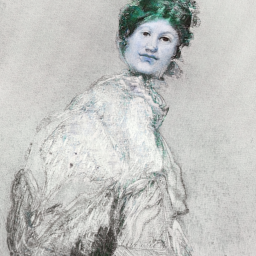

In [12]:
import cv2

# Load an image
img = cv2.imread(style_path_wikiart)

# Resize the image
img_resized = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

# Save or display the resized image
# cv2.imwrite('/content/drive/MyDrive/GANsNFTs/styles-256x256/starry-night_256x256.jpg', img_resized)
display('Resized Image', img_resized)

In [18]:
content_image = load_image(content_path)
style_image = load_image(style_path_wikiart)

In [29]:
content_image = load_image(content_path)
style_image = load_image("/content/drive/MyDrive/GANsNFTs/styles-256x256/image3_256x256.jpg")

In [ ]:
content_image = load_image(content_path)
style_image = load_image(style_path2)

In [ ]:
content_image = load_image(content_path)
style_image = load_image(style_path3)

In [14]:
content_image.shape

TensorShape([1, 1024, 1024, 3])

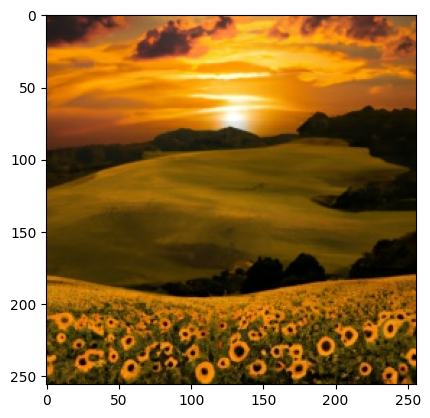

In [30]:
plt.imshow(np.squeeze(style_image))
plt.show();

In [26]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

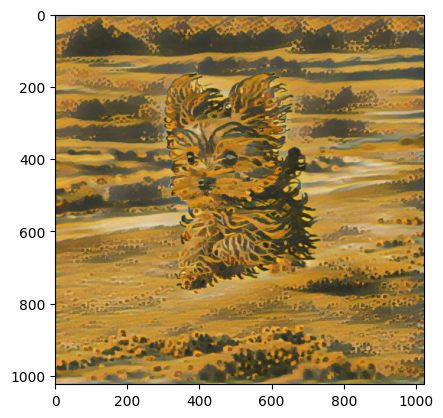

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

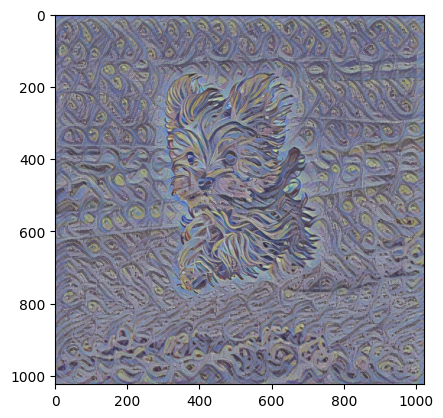

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

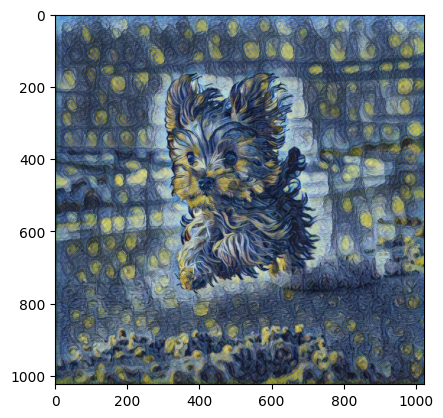

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

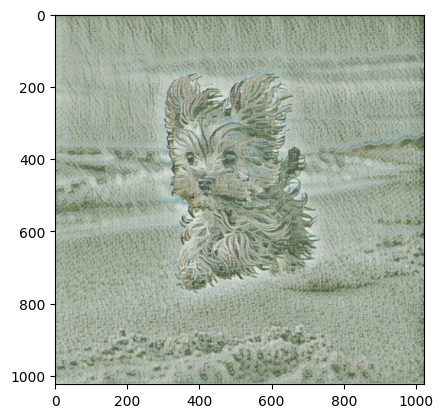

In [20]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

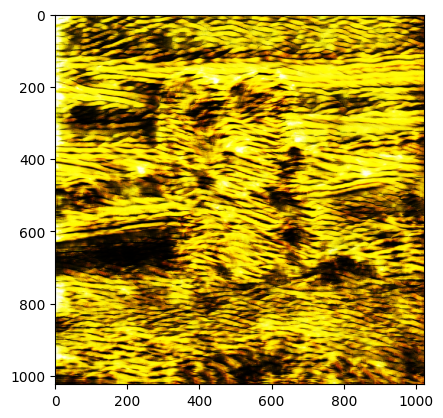

In [31]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

'Resized Image'

array([[[ 28,  29,  42],
        [ 27,  27,  38],
        [ 28,  28,  37],
        ...,
        [ 57,  87, 117],
        [ 56,  85, 115],
        [ 56,  84, 114]],

       [[ 27,  28,  44],
        [ 27,  28,  40],
        [ 28,  27,  36],
        ...,
        [ 56,  86, 120],
        [ 57,  87, 117],
        [ 55,  86, 116]],

       [[ 29,  33,  63],
        [ 28,  31,  54],
        [ 27,  27,  42],
        ...,
        [ 56,  88, 123],
        [ 55,  88, 121],
        [ 54,  88, 119]],

       ...,

       [[  8,  48,  60],
        [  8,  35,  42],
        [  7,  56,  68],
        ...,
        [  4,  25,  31],
        [  2,  11,  13],
        [  5,  18,  20]],

       [[  8,  46,  56],
        [ 10,  42,  49],
        [ 15,  56,  65],
        ...,
        [  6,  37,  47],
        [  2,  17,  19],
        [  2,  12,  13]],

       [[  8,  38,  48],
        [ 12,  41,  48],
        [  4,  29,  36],
        ...,
        [ 12,  66,  87],
        [  8,  42,  52],
        [  4,  24,  27]]], dtype=uint8)
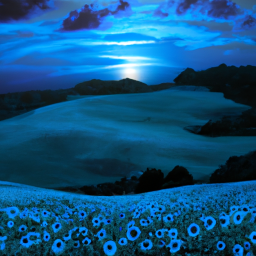

In [28]:
import cv2
style_path_wikiart = "/content/drive/MyDrive/GANsNFTs/CycleGAN/Generated-Images-DALL-E/testA/image_3.jpg"
# Load an image
img = cv2.imread(style_path_wikiart)

# Resize the image
img_resized = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

# Save or display the resized image
cv2.imwrite('/content/drive/MyDrive/GANsNFTs/styles-256x256/image3_256x256.jpg', img_resized)
display('Resized Image', img_resized)